# Replikacija podataka

In [87]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

In [88]:
import warnings
warnings.filterwarnings('ignore')

In [89]:
%store -r data

Prisjetimo se kako izgledaju podatci.

In [90]:
data.head()

,Diagnosis,Mean Radius,Mean Texture,Mean Perimeter,Mean Area,Mean Smoothness,Mean Compactness,Mean Concavity,Mean Concave Points,Mean Symmetry,...,Worst Radius,Worst Texture,Worst Perimeter,Worst Area,Worst Smoothness,Worst Compactness,Worst Concavity,Worst Concave Points,Worst Symmetry,Worst Fractal dimension
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


U prethodnoj bilježnici provjerena je korelacija svih pojedinačnih značajki s izlaznom dijagnozom. Značajke s malom korelacijom mogu se ukloniti jer ne utječu značajno na dijagnozu. Zbog toga se značajke "Mean Fractal dimension", "Texture SE" i "Symmetry SE" izbacuju iz skupa podataka.

In [91]:
data.drop((["Mean Fractal dimension", "Texture SE", "Symmetry SE"]), axis=1, inplace=True)

In [92]:
data.head()

,Diagnosis,Mean Radius,Mean Texture,Mean Perimeter,Mean Area,Mean Smoothness,Mean Compactness,Mean Concavity,Mean Concave Points,Mean Symmetry,...,Worst Radius,Worst Texture,Worst Perimeter,Worst Area,Worst Smoothness,Worst Compactness,Worst Concavity,Worst Concave Points,Worst Symmetry,Worst Fractal dimension
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Klasifikacija


Metode klasifikacije korištene u članku redom su: Support Vector Machine, Logistic Regression, K-Nearest Neighbors, 
Decision Tree, Naive Bayes i Random Forest. Podatci se klasificiraju na maligne i benigne. Testni skup za klasifikaciju čini 25% ukupnog skupa podataka.

Za svaki od algoritama računa se točnost skupa za treniranje i točnost skupa za testiranje kako bi se dobiveni podatci usporedili s onima iz članka. Također su prikazane matrice zabune (engl. confusion matrix).

In [267]:
def klasificiraj(df, algo):
    X = df.loc[:, df.columns != 'Diagnosis']
    y = df.loc[:, 'Diagnosis']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

    model = algo()   
    model.fit(X_train, y_train)

    y_pred_train = model.predict(np.ascontiguousarray(X_train))
    y_pred_test = model.predict(np.ascontiguousarray(X_test))
    
    conf_matrix = confusion_matrix(y_train, y_pred_train)
    TP = conf_matrix[1, 1]
    TN = conf_matrix[0, 0]
    FP = conf_matrix[0, 1]
    FN = conf_matrix[1, 0]
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    sns.heatmap(conf_matrix, annot=True, fmt='d')
    plt.title("Training data")
    print(f'Training Accuracy: {round(accuracy*100, 1)}%')
    
    conf_matrix = confusion_matrix(y_test, y_pred_test)
    TP = conf_matrix[1, 1]
    TN = conf_matrix[0, 0]
    FP = conf_matrix[0, 1]
    FN = conf_matrix[1, 0]
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    
    plt.subplot(1,2,2)
    sns.heatmap(conf_matrix, annot=True, fmt='d')
    plt.title("Testing data")
    print(f'Testing Accuracy: {round(accuracy*100, 1)}%')

## Support Vector Machine
Rezultati u članku za ovaj algoritam daju training accuracy od 98.8% i testing accuracy od 96.5%.

Training Accuracy: 96.2%
Testing Accuracy: 96.5%


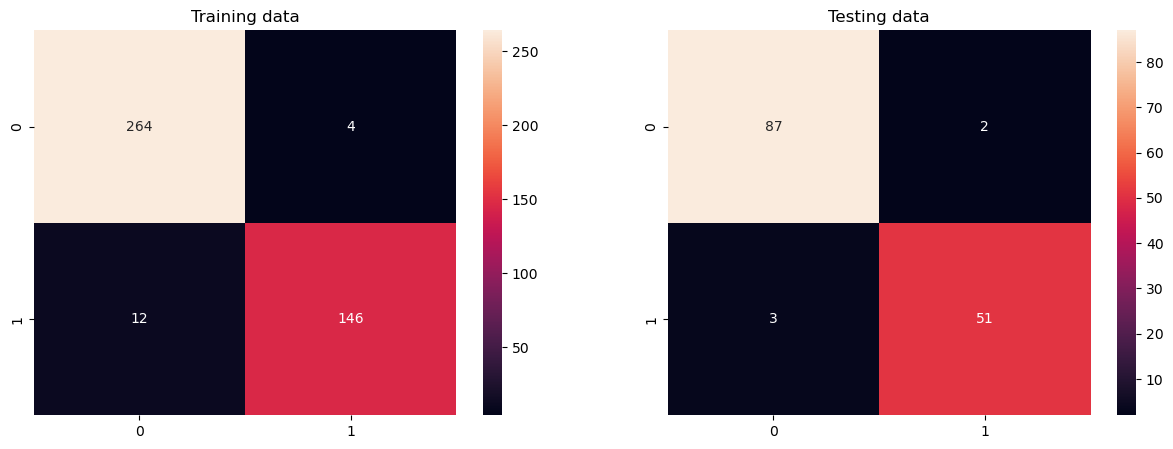

In [268]:
svm = lambda: SVC(kernel="linear", random_state=42)
klasificiraj(data, svm)

## Logistička regresija
Rezultati u članku za ovaj algoritam daju training accuracy od 99.1% i testing accuracy od 94.4%.

Training Accuracy: 95.8%
Testing Accuracy: 97.2%


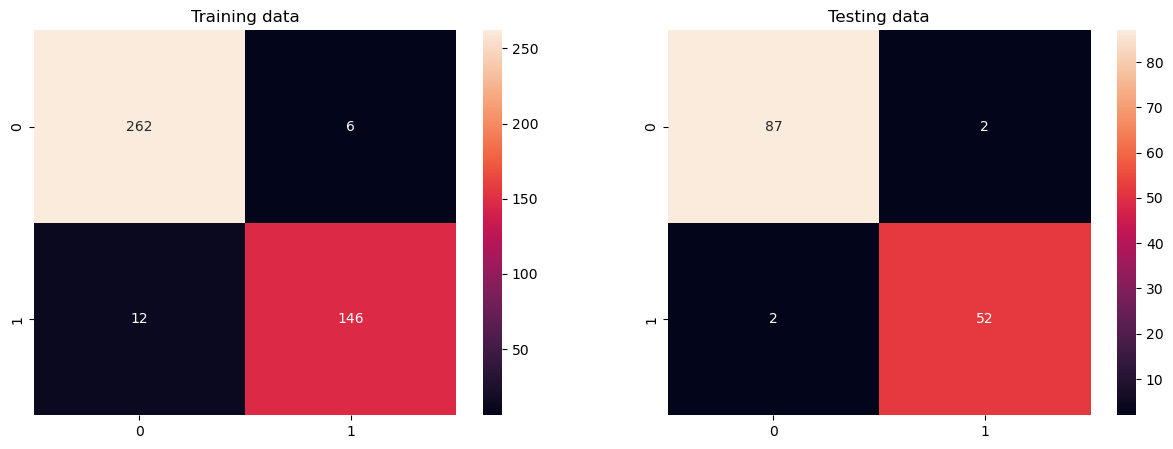

In [269]:
log_reg = lambda: LogisticRegression(max_iter=3000, random_state=42)
klasificiraj(data, log_reg)

## K-Nearest Neighbors
Rezultati u članku za ovaj algoritam daju training accuracy od 97.6% i testing accuracy od 95.8%.

Training Accuracy: 92.0%
Testing Accuracy: 96.5%


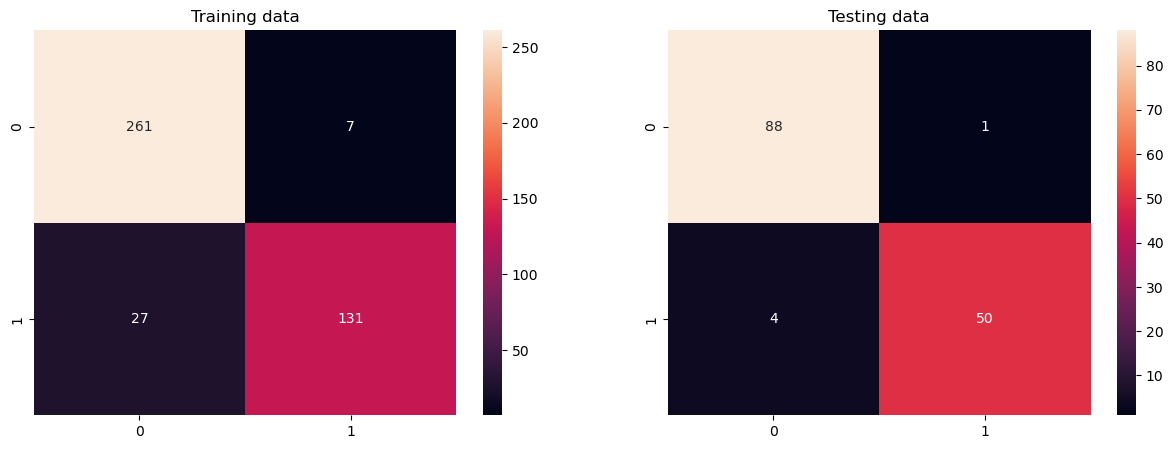

In [270]:
def knn_eval(n_instances=100, n_features=2, n_classes=2, n_informative=2, 
             test_size=0.3, k_range=(1, 20), n_trials=40):
    
    train_errors = []
    test_errors = []
    ks = list(range(k_range[0], k_range[1] + 1))

    for i in range(0, n_trials):
        X, y = make_classification(n_instances, n_features, n_classes=n_classes, 
                                   n_informative=n_informative, n_redundant=0, n_clusters_per_class=1)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
        train = []
        test = []
        for k in ks:
            knn = KNeighborsClassifier(n_neighbors=k)
            knn.fit(X_train, y_train)
            train.append(1 - knn.score(X_train, y_train))
            test.append(1 - knn.score(X_test, y_test))
        train_errors.append(train)
        test_errors.append(test)
        
    train_errors = np.mean(np.array(train_errors), axis=0)
    test_errors = np.mean(np.array(test_errors), axis=0)
    best_k = ks[np.argmin(test_errors)]
    
    return best_k

best_k = knn_eval(n_instances=data.shape[0], n_features=data.shape[1]-1)
knn = lambda: KNeighborsClassifier(n_neighbors=best_k)
klasificiraj(data, knn)

## Stablo odluke
Rezultati u članku za ovaj algoritam daju training accuracy od 100% i testing accuracy od 95.1%.

Training Accuracy: 100.0%
Testing Accuracy: 95.1%


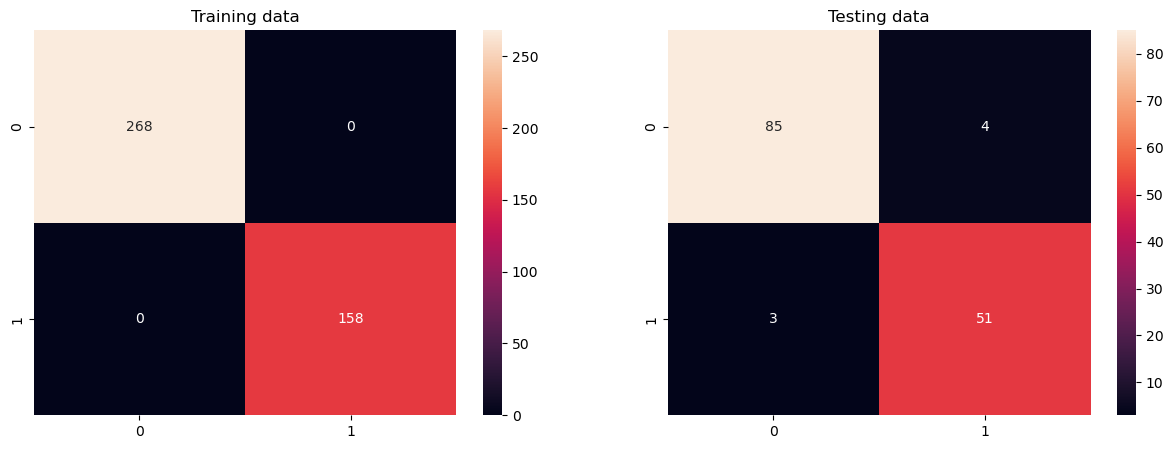

In [271]:
dec_tree = lambda: DecisionTreeClassifier(random_state=42)
klasificiraj(data, dec_tree)

## Naive Bayes
Rezultati u članku za ovaj algoritam daju training accuracy od 95.1% i testing accuracy od 92.3%.

Training Accuracy: 88.3%
Testing Accuracy: 92.3%


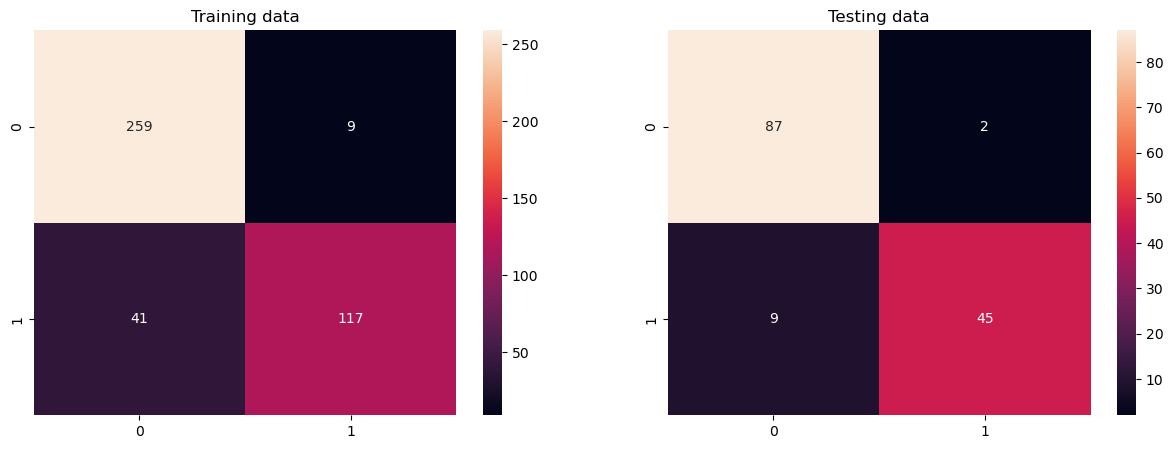

In [272]:
bayes = lambda: MultinomialNB()
klasificiraj(data, bayes)

## Random Forest
Rezultati u članku za ovaj algoritam daju training accuracy od 99.5% i testing accuracy od 96.5%

Training Accuracy: 100.0%
Testing Accuracy: 96.5%


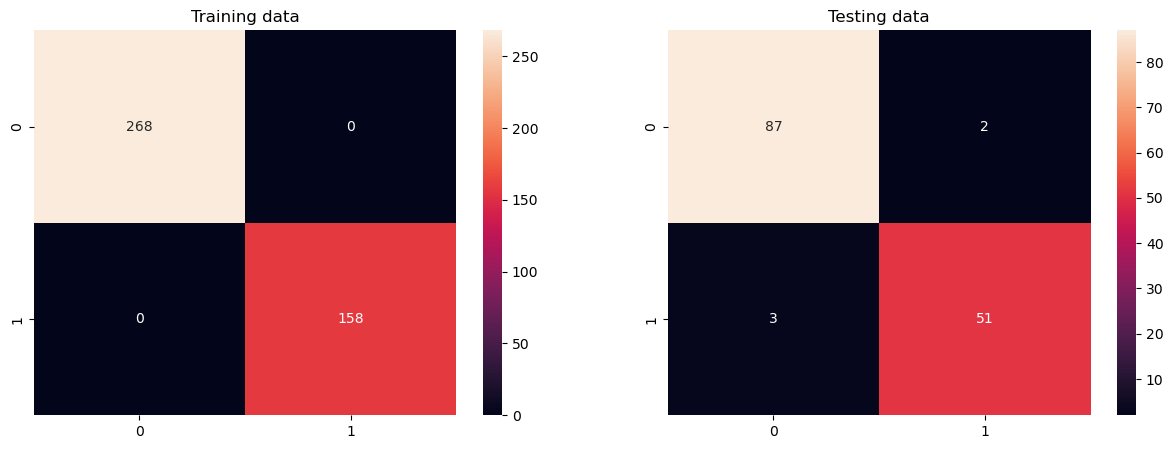

In [273]:
rnd_forest = lambda: RandomForestClassifier(random_state=42)
klasificiraj(data, rnd_forest)

## Zaključak
Glavni problem dobivenih rezultata je neočekivano manji training accuracy. Primarni razlog za to u ovom slučaju je podjela skupa podataka na train set i test set. Primjetno je da uslijed promjene hiperparametra random state dobivamo drugačiju točnost klasifikacije. Općenito, parametar random_state koristi se kako bismo mogli reproducirali rezultate umjesto da su svaki put nasumični. Unatoč rezultatima ostavila sam parametar random_state=42 kako se konvencionalno koristi. Dodatno, uz tu vrijednost parametra smo za 4/6 korištenih klasifikacijskih algoritama uspjeli dobiti testing accuracy identičan onome iz članka. 

Ostali mogući razlozi za manji training accuracy su mali skup podataka, nebalansirani podatci i postojanje stršećih podataka. Naime, stršeći podatci primijećeni su još u prošloj bilježnici, no kako je cilj ove bilježnice isključivo replikacija rezultata iz članka, iz skupa su izbačene samo značajke koje su naglašene kao izbačene u članku.

Odstupanje između dobivenih podataka i onih iz članka je normalno. Unatoč korištenju istog skupa podataka i istog omjera train i test seta, moguće su razlike u korištenim bibliotekama i hiperparametrima.